In [113]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [114]:
def load_data(path):
    train_dataset = h5py.File(path+'/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File(path+'/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes
    

In [115]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data('C:/Users/Enc/Desktop/dataset') # you should creat dataset file and put datas into this file you need to change your dataset path

y = 0. It's a non-cat picture.


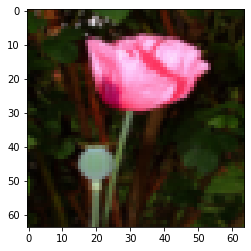

In [116]:
index = 30
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [117]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [118]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [119]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [120]:

def initialize_parameters_deep(layer_dims):
    global parameters


    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1","W2", "b2":
    """
    
    np.random.seed(1)
    parameters={}
    (n_x, n_h, n_y) = layers_dims

    parameters["W1"] = np.random.randn(layer_dims[1], layers_dims[0]) / np.sqrt(layers_dims[0])
    parameters["b1"] = np.zeros((layer_dims[1], 1))  
    parameters["W2"] = np.random.randn(layer_dims[2], layers_dims[1]) / np.sqrt(layers_dims[1]) 
    parameters["b2"] = np.zeros((layer_dims[2], 1))
    
    
    
    return parameters


In [121]:
def Sigmoid(Z):
    return 1/(1+np.exp(-Z))

def Relu(Z):
    return np.maximum(0,Z)

def dRelu2(dZ, Z):    
    dZ[Z <= 0] = 0    
    return dZ

def dRelu(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

def dSigmoid(Z):
    b = 1/(1+np.exp(-Z))
    dZ = b * (1-b)
    return dZ


In [122]:
def linear_activation_forward(X,parameters):
    global ch
    global cost

    
    Z1 = (np.dot(parameters['W1'], X))+ parameters['b1'] 
    A1 = Relu(Z1)
    ch['Z1'],ch['A1']=Z1,A1
        
    Z2 = parameters['W2'].dot(A1) + parameters['b2']
    A2 = Sigmoid(Z2)
    ch['Z2'],ch['A2']=Z2,A2

    AL=A2
    cost=A2
    return AL

    """
    Implement the forward propagation

    Arguments:
    X -- input data:
    parameters -- python dictionary containing your parameters "W1", "b1","W2", "b2":

    Returns:
    AL -- output of the forward propogation
    """
    
    


In [123]:
def compute_cost( Y,sam,AL):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cost
     print(Y.shape[1])
    print(AL.T.shape[1])
    print(np.log(AL).T.shape[1])
    print(np.log(1-AL).T.shape[1])
    rint(AL)
    """
   
    AL = np.squeeze(np.asarray(AL))
    

    cost = (1./sam) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))    
   # print(cost.shape[0])    



    return cost

In [124]:
def linear_activation_backward(X,Y,AL,ch):
    global parameters         
    """
    Implement the backward propagation
    
    Arguments:
    X -- input data
    cost -- cost
    
    Returns:
    grads --  A dictionary with the gradients
             grads["dW1"]
             grads["db1"]
             grads["dW2"]
             grads["db2"]
    """
    # print("\n",AL.shape[1])


    dcost_AL = - (np.divide(Y, AL ) - np.divide(1 - Y, 1 - AL))    
        
    dcost_Z2 =  np.multiply(dcost_AL,dSigmoid(ch["Z2"]))
   # print(dcost_Z2.T.shape[0])
   # print(parameters["W2"].shape[0])
    dcost_A1 =  np.dot(parameters["W2"].T,dcost_Z2)
    dcost_W2 = 1./ch['A1'].shape[1] * np.dot(dcost_Z2,ch['A1'].T)
    dcost_b2 = 1./ch['A1'].shape[1] * np.dot(dcost_Z2, np.ones([dcost_Z2.shape[1],1])) 
                            
    dcost_Z1 = dcost_A1 * dRelu(ch['Z1'])        
    dcost_A1 = np.dot(parameters["W1"].T,dcost_Z1)
    dcost_W1 = 1./X.shape[1] * np.dot(dcost_Z1,X.T)
    dcost_b1 = 1./X.shape[1] * np.dot(dcost_Z1, np.ones([dcost_Z1.shape[1],1]))  
    grads={}
    grads["W1"] = dcost_W1
    grads["b1"] = dcost_b1
    grads["W2"] = dcost_W2
    grads["b2"] = dcost_b2
    
    return grads


In [125]:

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
             parameters["W1"]
             parameters["b1"]
             parameters["W2"]
             parameters["b2"]
    """
    parameters["W1"]=parameters["W1"]-learning_rate*grads["W1"]
    parameters["b1"]=parameters["b1"]-learning_rate*grads["b1"]
    parameters["W2"]=parameters["W2"]-learning_rate*grads["W2"]
    parameters["b2"]=parameters["b2"]-learning_rate*grads["b2"]
    return parameters


In [126]:
def predict(test_x, test_y, parameters,threshold):

    """
    Predict test data
    test_x -- test data
    test_y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)
    
    Returns:
    accuracy -- accuracy of your model
    
    """
    predictions = np.zeros((1,test_x.shape[1]))
    pred=linear_activation_forward(test_x, parameters)
    
    for i in range(0, pred.shape[1]):
        predictions[0,i] = (pred[0,i] > threshold)
    
    accuracy = np.sum((predictions == test_y)/test_x.shape[1])
    return predictions, accuracy


In [127]:
def plot_cost(cost,learning_rate):
    np.random.seed(1)
    
        

    plt.plot(np.squeeze(cost))
    plt.ylabel('cost')
    plt.xlabel('Iter')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
 


In [128]:
def two_layer_model(X, Y, layers_dims, learning_rate , num_iterations) :
    global costList
    global ch
    global permanentAL
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costList = []                             # to keep track of the cost
    ch={}
    m = X.shape[1]                           # number of examples
    
    AL=np.zeros((1,Y.shape[1])) 
    sam =Y.shape[1]
    threshold=0.5

    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###

    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ###
        AL=linear_activation_forward(X,parameters)
        
        ### END CODE HERE ###
        
        # Compute cost
        ### START CODE HERE ### 
        costcomputed = compute_cost(Y,sam,AL)
        
        
        
        
        
        
    
        ### END CODE HERE ###
        
        
        # Backward propagation.
        ### START CODE HERE ### 
        grads = linear_activation_backward(X,Y,AL,ch)
        ### END CODE HERE ###

        
        # Update parameters.
        ### START CODE HERE ### 
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
        
        # Print the cost every 100 training example
        if i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(costcomputed)))
        if i % 100== 0:
            costList.append(costcomputed)

    return parameters, costList,AL,ch

In [129]:
#def main():



"""Main function
You need to combine all functions in the main function"""
learning_rate = 0.0075
num_iterations = 30
x,y=train_x, train_y

parameters,cost,AL,dict= two_layer_model(train_x, train_y, layers_dims, learning_rate, num_iterations)
#plot_cost(cost,learning_rate,num_iterations,x,y,AL,ch)
test_predictions, test_accuracy = predict(test_x, test_y, parameters, 0.8)
print("Test Accuracy: " + str(test_accuracy))
train_predictions,train_accuracy=predict(train_x,train_y,parameters,0.87)
print("train accuracy : ",train_accuracy)
#main()

Cost after iteration 0: 0.6950464961800915
Test Accuracy: 0.3400000000000001
train accuracy :  0.6555023923444976


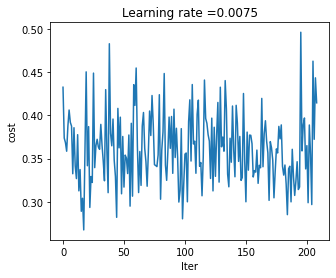

In [130]:
plot_cost(cost,learning_rate)



